In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
sc.settings.set_figure_params(dpi=80, facecolor='white',figsize=(12,6))

In [173]:
#Read the data and transpose

In [2]:
adata1=sc.read_csv('Human_muscle/GSM3746212_Muscle_1_Counts.csv').T
adata2=sc.read_csv('Human_muscle/GSM3746213_Muscle_2_Counts.csv').T
adata3=sc.read_csv('Human_muscle/GSM3746214_Muscle_3_Counts.csv').T
adata4=sc.read_csv('Human_muscle/GSM3746215_Muscle_4_Counts.csv').T

In [3]:
adata1.obs['Sample']='Sample_1'
adata2.obs['Sample']='Sample_2'
adata3.obs['Sample']='Sample_3'
adata4.obs['Sample']='Sample_4'

In [4]:
#Combine the data
adata=sc.concat([adata1,adata2,adata3,adata4],axis=0)

In [5]:
adata

AnnData object with n_obs × n_vars = 2876 × 15406
    obs: 'Sample'

## Preprocessing

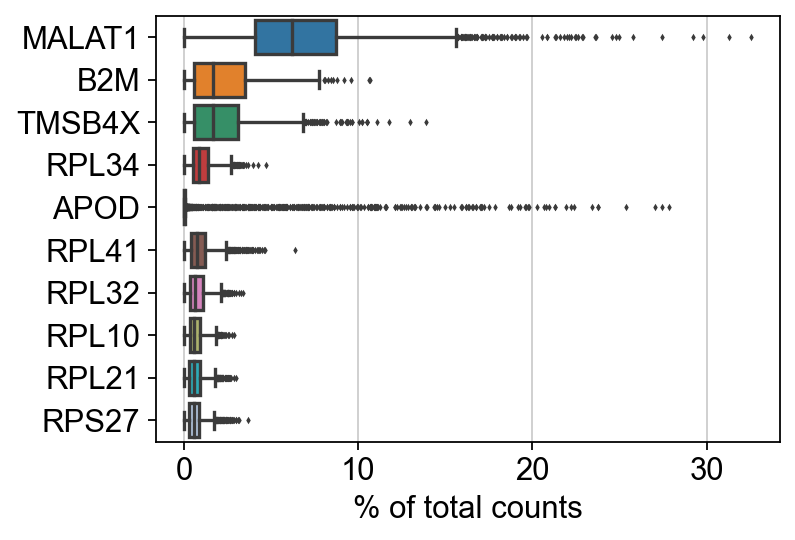

In [6]:
#Show those genes that yield the highest fraction of counts in each single cell, across all cells.
sc.pl.highest_expr_genes(adata, n_top=10)

In [7]:
# filtering, filter geene that less than 200 genes, and genes that expressed less than 3 cells.
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [8]:
#15406-15054=352 Genes are filtered.
adata

AnnData object with n_obs × n_vars = 2876 × 15054
    obs: 'Sample', 'n_genes'
    var: 'n_cells'

In [9]:
## Filter cells that contain high mitochondrial genes (High proportions are indicative of poor-quality cells)
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'


In [10]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [11]:
adata.var

n_cells     mt  n_cells_by_counts  mean_counts  \
RP11-34P13.7         3  False                  3     0.002086   
AP006222.2          83  False                 83     0.049026   
RP4-669L17.10        6  False                  6     0.002086   
RP11-206L10.3        7  False                  7     0.004172   
RP11-206L10.2        4  False                  4     0.002782   
...                ...    ...                ...          ...   
AL592183.1         451  False                451     0.289986   
AL354822.1          26  False                 26     0.011822   
KIR2DL2              4  False                  4     0.001391   
PNRC2.1              3  False                  3     0.001043   
SRSF10.1             7  False                  7     0.002434   

               pct_dropout_by_counts  total_counts  
RP11-34P13.7               99.895688           6.0  
AP006222.2                 97.114047         141.0  
RP4-669L17.10              99.791377           6.0  
RP11-206L10.3              99.756606          12.0  
RP11-206L10.2              99.860918           8.0  
...                              ...           ...  
AL592183.1                 84.318498         834.0  
AL354822.1                 99.095967          34.0  
KIR2DL2                    99.860918           4.0  
PNRC2.1                    99.895688           3.0  
SRSF10.1                   99.756606           7.0  

[15054 rows x 6 columns]

In [12]:
adata.obs

Sample  n_genes  n_genes_by_counts  total_counts  \
1_AAACCTGCAATCCGAT  Sample_1     1595               1595        9334.0   
1_AAACGGGGTCCAGTAT  Sample_1      295                295         765.0   
1_AAACGGGTCGGCTTGG  Sample_1      443                443        1150.0   
1_AAAGATGAGCAATATG  Sample_1     1131               1129        5075.0   
1_AAAGATGGTCAAAGCG  Sample_1      734                734        2391.0   
...                      ...      ...                ...           ...   
4_TTGTAGGTCTCTAAGG  Sample_4      633                633        1825.0   
4_TTTACTGAGACTGTAA  Sample_4      384                384        2065.0   
4_TTTACTGTCAGCCTAA  Sample_4      544                544        1354.0   
4_TTTCCTCAGGTGGGTT  Sample_4      267                267         904.0   
4_TTTGGTTCACTGTCGG  Sample_4      760                760        2779.0   

                    total_counts_mt  pct_counts_mt  
1_AAACCTGCAATCCGAT            331.0       3.546175  
1_AAACGGGGTCCAGTAT             35.0       4.575163  
1_AAACGGGTCGGCTTGG             35.0       3.043478  
1_AAAGATGAGCAATATG             96.0       1.891626  
1_AAAGATGGTCAAAGCG             22.0       0.920117  
...                             ...            ...  
4_TTGTAGGTCTCTAAGG             62.0       3.397260  
4_TTTACTGAGACTGTAA             54.0       2.615012  
4_TTTACTGTCAGCCTAA             58.0       4.283604  
4_TTTCCTCAGGTGGGTT              4.0       0.442478  
4_TTTGGTTCACTGTCGG            132.0       4.749910  

[2876 rows x 6 columns]

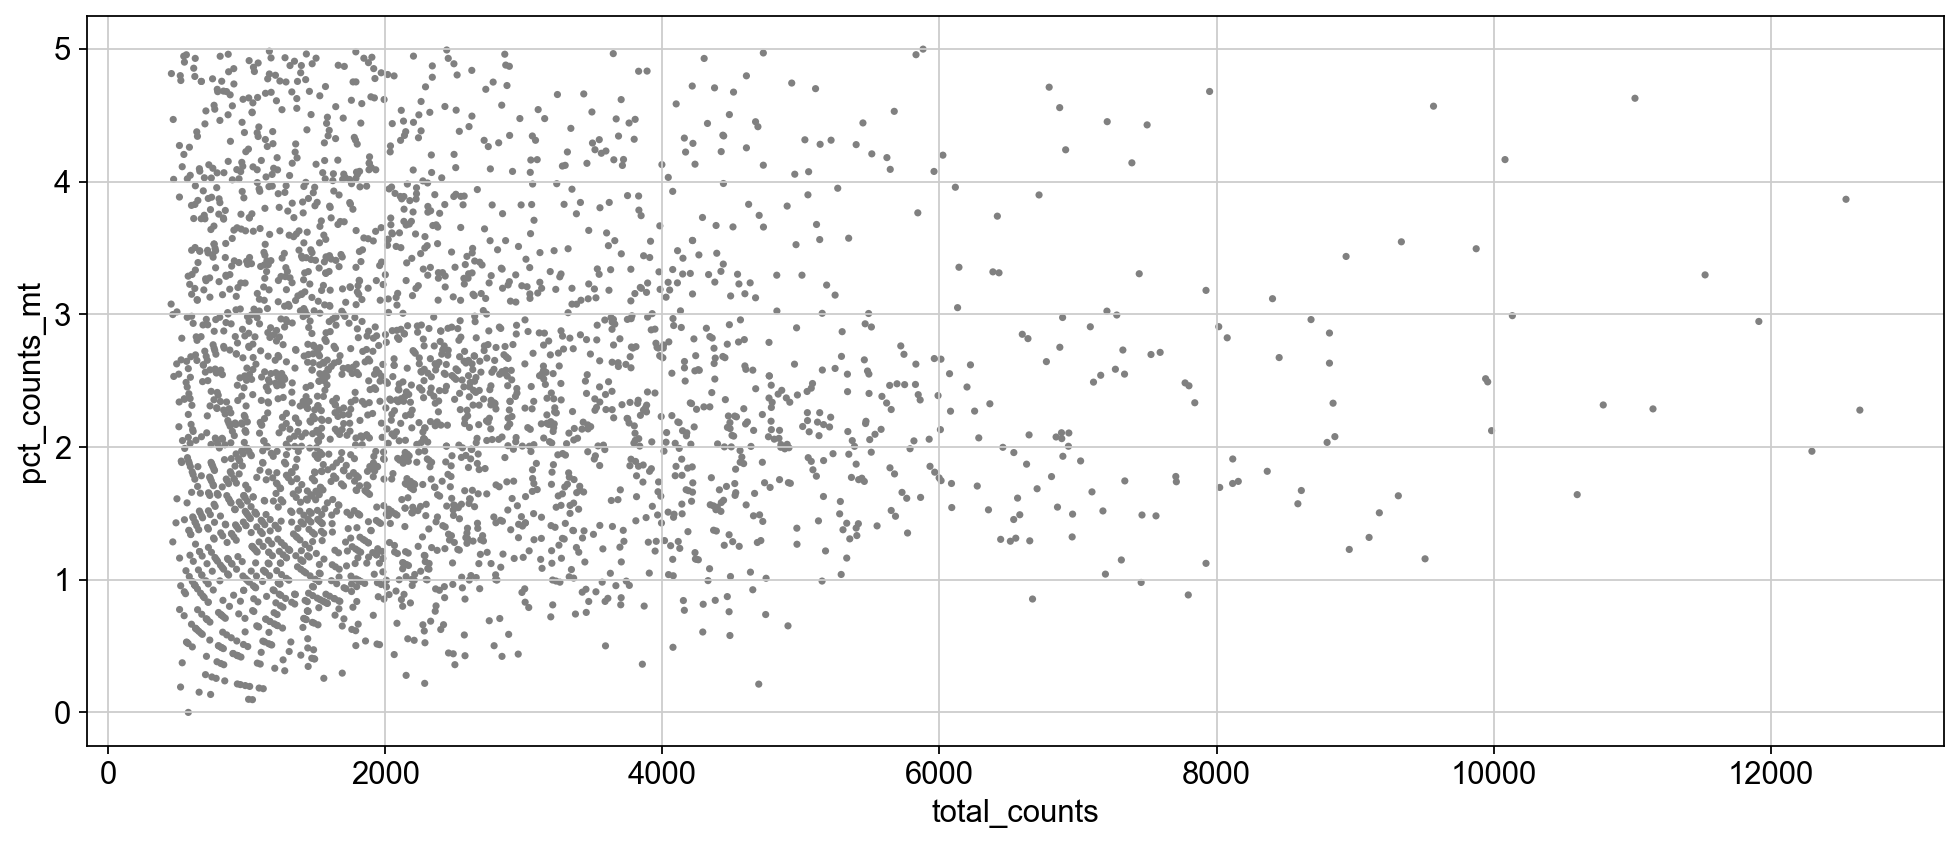

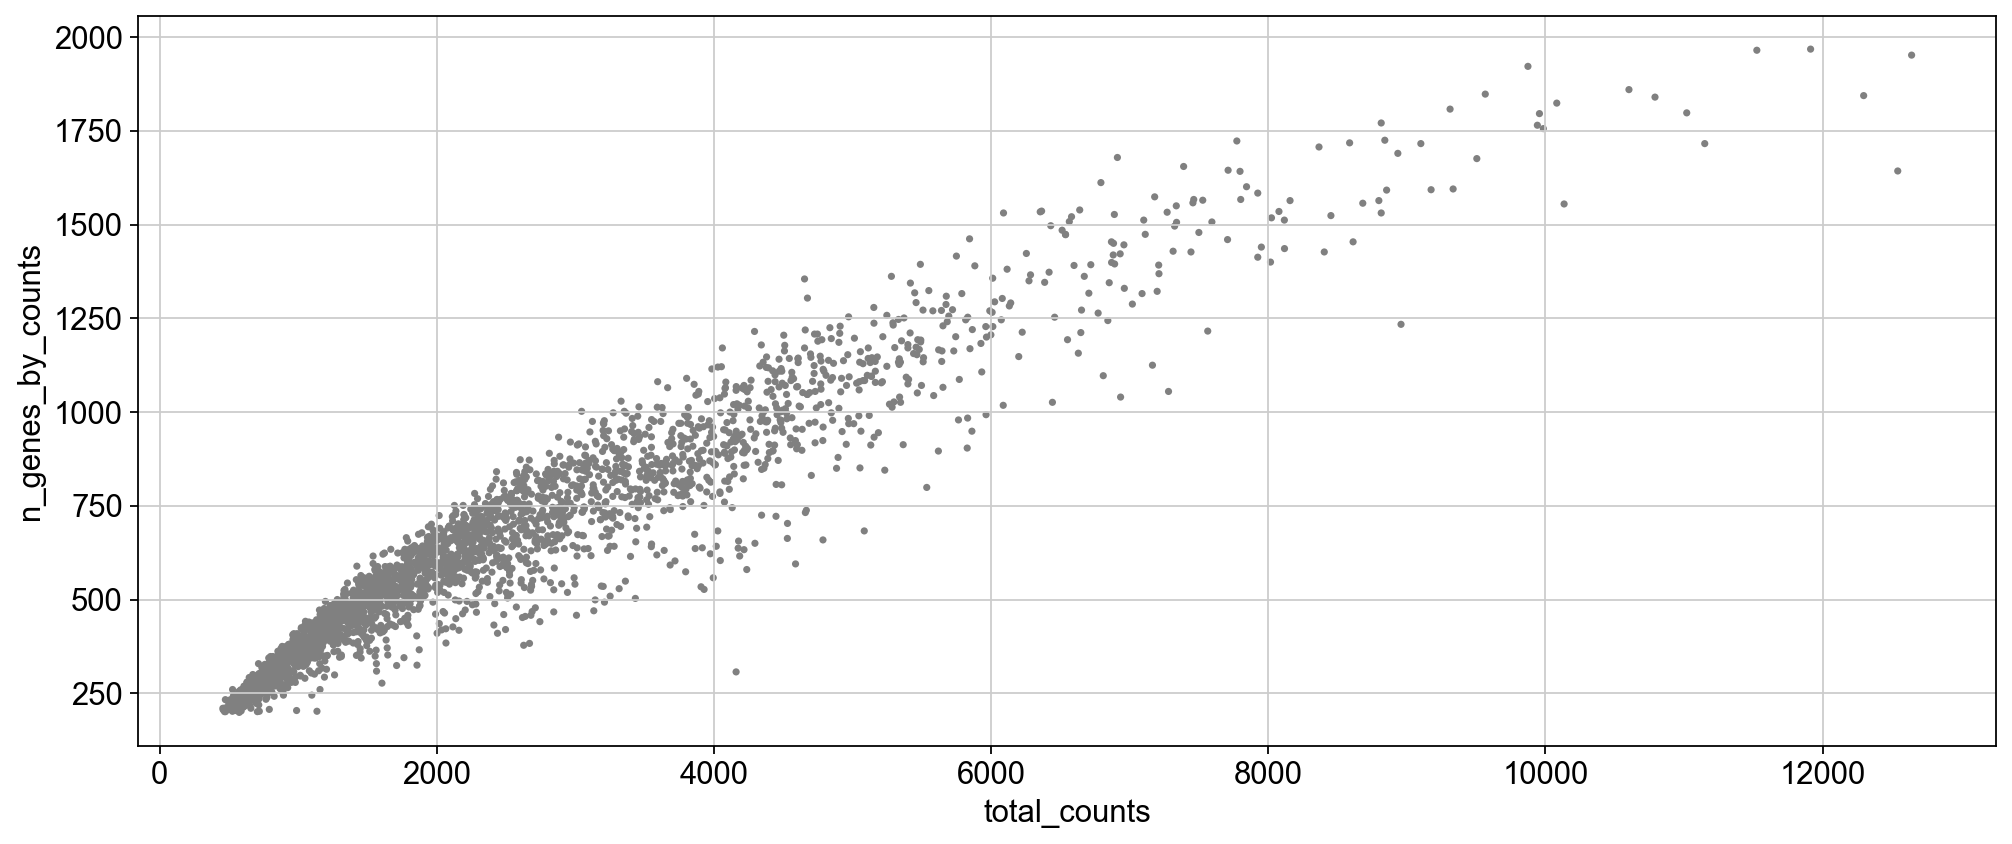

In [13]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [14]:
#filter (one sample must have at least 2500 genes expressed, and have at most 5% mt genes.)
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [15]:
adata

View of AnnData object with n_obs × n_vars = 2876 × 15054
    obs: 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

## Normalize

In [16]:
sc.pp.normalize_total(adata, target_sum = 1e4)

D:\Anaconda3\lib\site-packages\scanpy\preprocessing\_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [17]:
sc.pp.log1p(adata)

In [18]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [19]:
# 4320 highly_variable genes.
sum(adata.var['highly_variable']==True)

4320

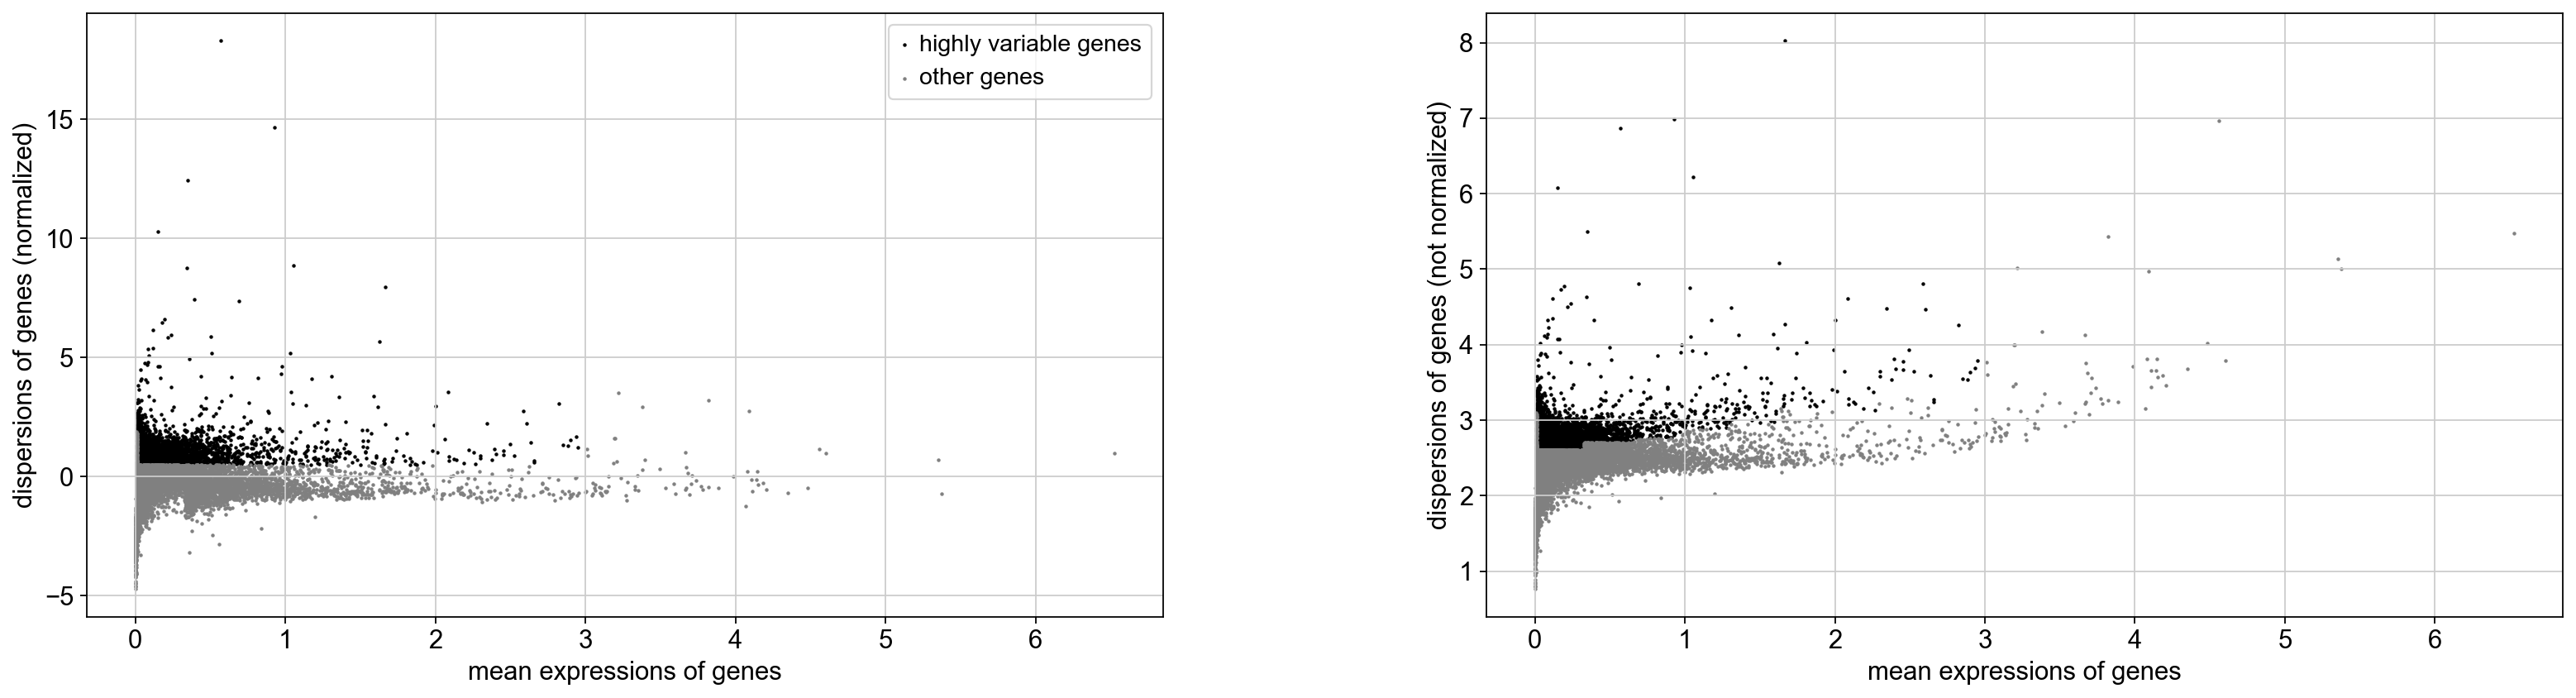

In [20]:
sc.pl.highly_variable_genes(adata)

In [21]:
#Set the .raw attribute of the AnnData object to the normalized and logarithmized raw gene expression for later use in differential 
#testing and visualizations of gene expression. This simply freezes the state of the AnnData object.
adata.raw = adata

In [22]:
adata=adata[:, adata.var.highly_variable]

In [23]:
#Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. Scale the data to unit variance.
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [24]:
adata.X

array([[-0.14797287, -0.0026019 , -0.18804713, ...,  0.05144483,
        -0.02518773,  0.01855329],
       [-0.03823389, -0.00420468, -0.23331176, ..., -0.01813505,
        -0.00731305, -0.00391488],
       [-0.0455447 , -0.00407323, -0.3817684 , ..., -0.07914419,
        -0.00674954, -0.01749695],
       ...,
       [-0.04613078, -0.00408567, -0.25257266, ..., -0.02288689,
        -0.00833852, -0.00453972],
       [-0.04660951, -0.00401399, -0.64956635, ..., -0.19471684,
        -0.0038163 , -0.04398167],
       [-0.06335864, -0.00384464, -0.18046825, ...,  0.0162052 ,
        -0.01189745,  0.00545807]], dtype=float32)

In [25]:
#The sc.pp.scale function in Scanpy is a preprocessing step used in the analysis of single-cell RNA sequencing (scRNA-seq) data. 
#It standardizes the expression data of each gene to have a mean of zero and a variance of one across cells. 
#This scaling is crucial for many downstream analyses that assume data is centered and scaled, such as principal component analysis (PCA).
sc.pp.scale(adata, max_value=10)

In [26]:
adata.X

array([[-0.40112522, -0.02741524, -0.19189316, ...,  0.11111305,
        -0.17613977,  0.08856374],
       [-0.10364452, -0.04430315, -0.23808356, ..., -0.03916896,
        -0.05114072, -0.01868759],
       [-0.12346268, -0.04291813, -0.38957652, ..., -0.17093946,
        -0.04720004, -0.08352131],
       ...,
       [-0.12505144, -0.04304924, -0.25773838, ..., -0.04943221,
        -0.05831194, -0.02167023],
       [-0.12634917, -0.04229392, -0.6628516 , ..., -0.4205589 ,
        -0.02668772, -0.20994553],
       [-0.17175277, -0.04050957, -0.18415926, ...,  0.03500078,
        -0.08319984,  0.02605397]], dtype=float32)

## Principal Component Analysis

In [27]:
sc.tl.pca(adata, svd_solver='arpack')

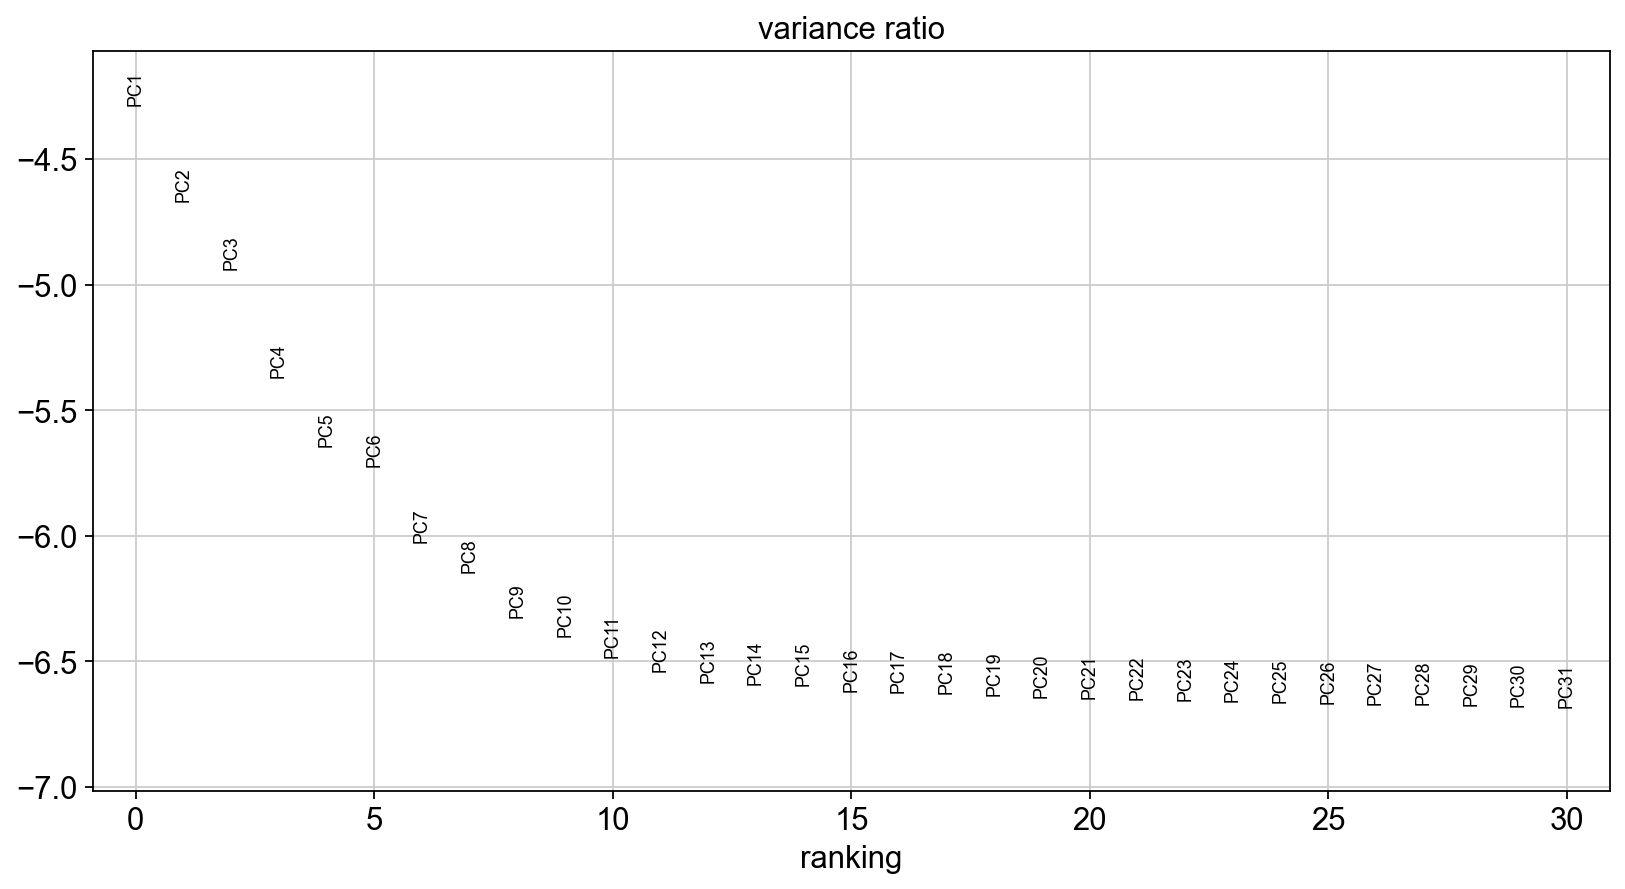

In [28]:
#Pc around 10-13 is the best for pc numbers.
sc.pl.pca_variance_ratio(adata, log=True)

In [29]:
adata.write('analysis_result')  # the file that will store the analysis results)

In [30]:
adata

AnnData object with n_obs × n_vars = 2876 × 4320
    obs: 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [31]:
#Computing the neighborhood.calculates the neighborhood graph of cells using the PCA representation of the data.
sc.pp.neighbors(adata,n_neighbors=10,n_pcs=15)

In [32]:
sc.tl.leiden(adata,resolution=0.3)

In [33]:
sc.tl.tsne(adata)

D:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


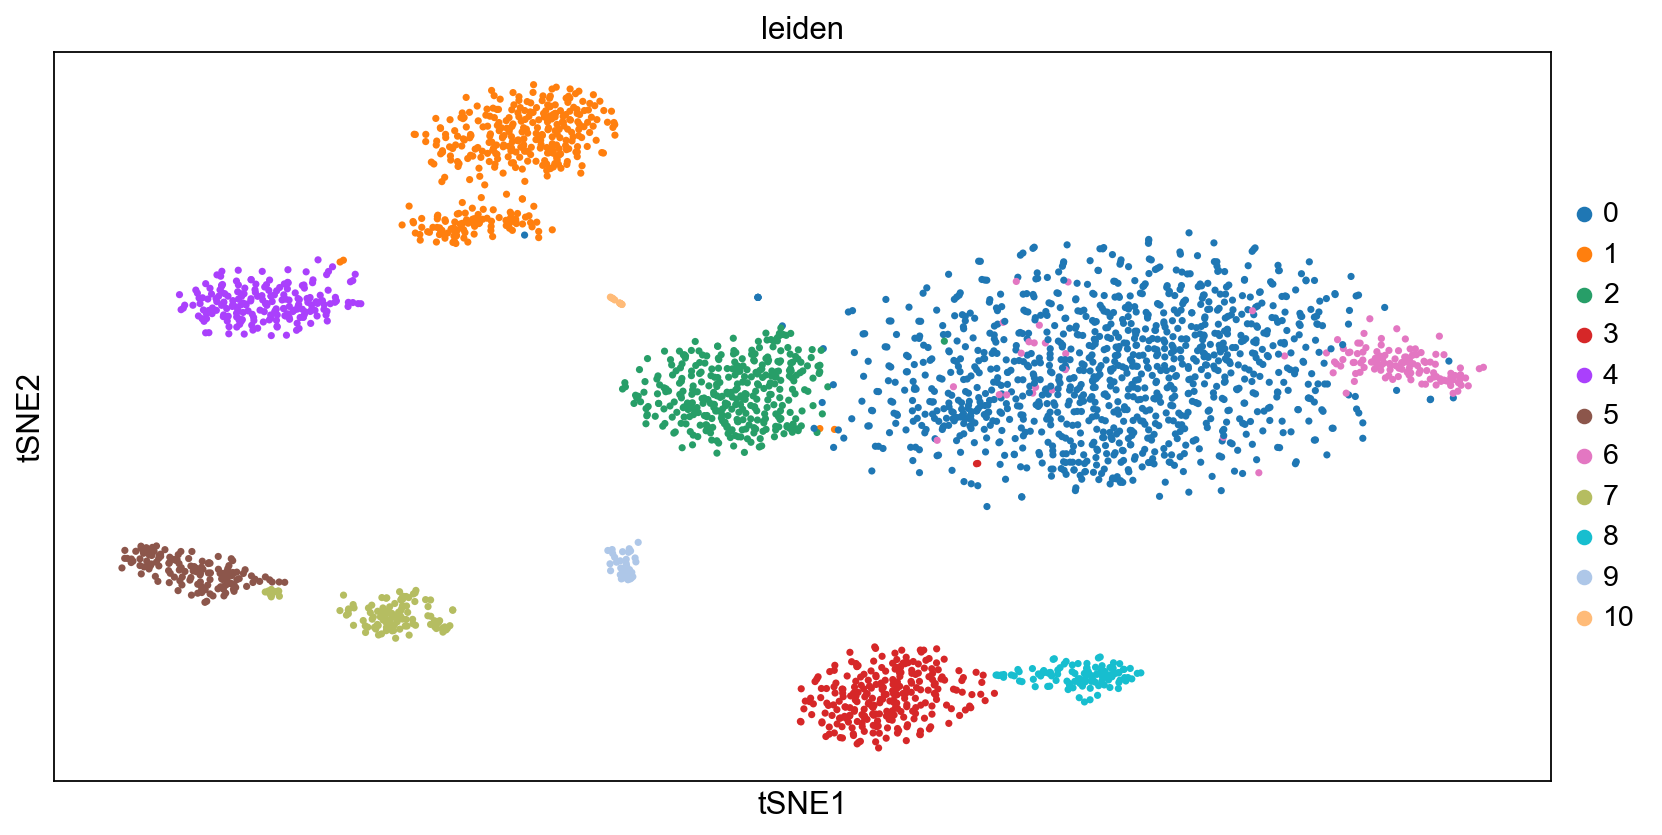

In [34]:
sc.pl.tsne(adata, color = ['leiden'])

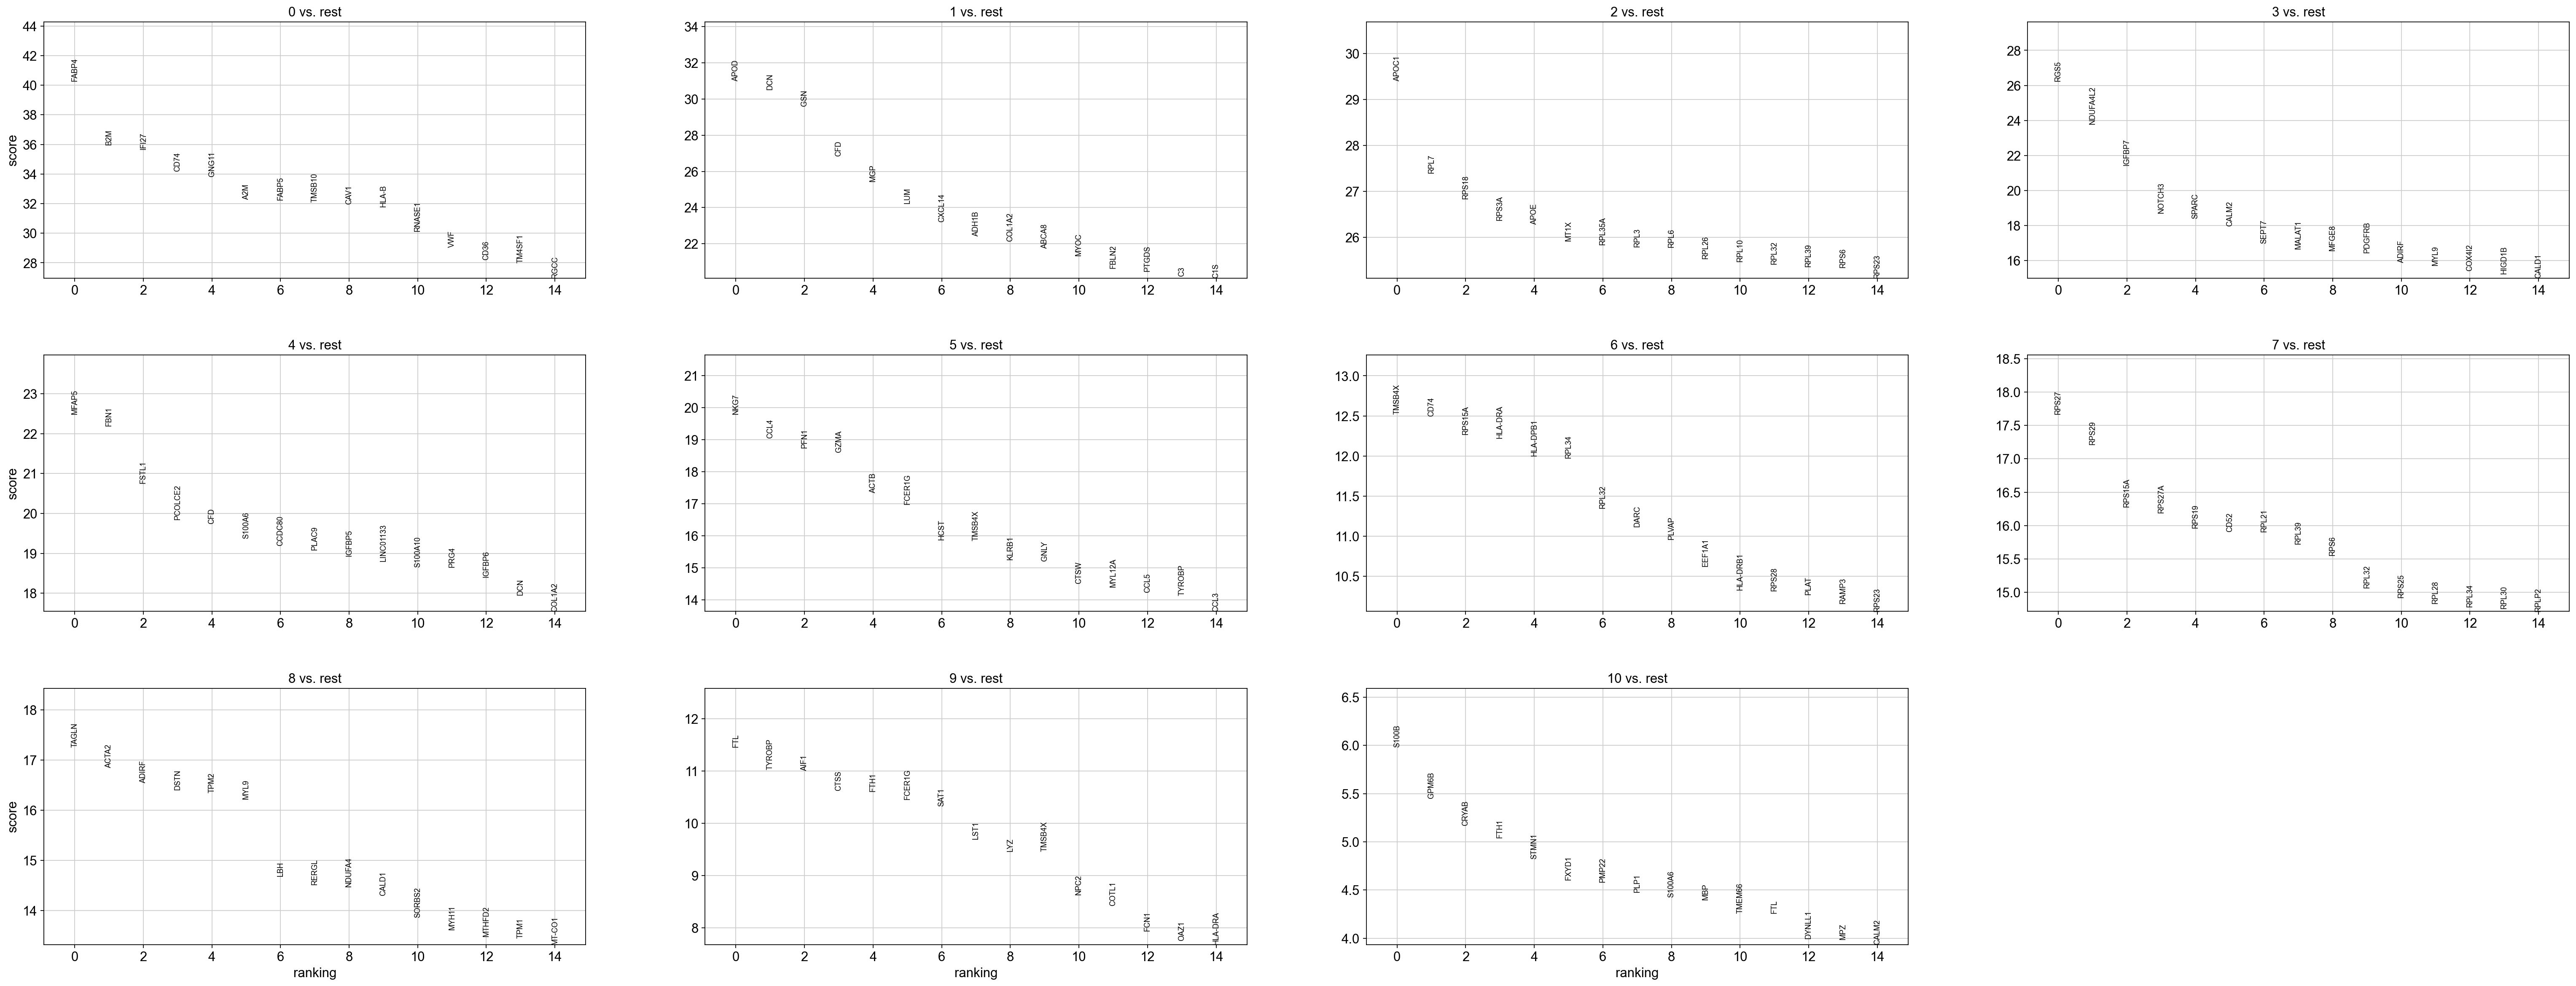

In [35]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False)

In [37]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(10)

0_n            0_p     1_n            1_p     2_n            2_p  \
0   FABP4   0.000000e+00    APOD  5.576431e-211   APOC1  4.685280e-190   
1     B2M  1.366617e-283     DCN  8.985383e-205    RPL7  2.928408e-165   
2   IFI27  1.652920e-278     GSN  1.242981e-192   RPS18  1.197980e-158   
3    CD74  5.679710e-256     CFD  1.314113e-158   RPS3A  2.744020e-153   
4   GNG11  5.475622e-251     MGP  1.031106e-142    APOE  3.230375e-152   
5     A2M  1.661519e-228     LUM  1.059509e-129    MT1X  4.554823e-148   
6   FABP5  5.971587e-228  CXCL14  3.913830e-119  RPL35A  3.806380e-147   
7  TMSB10  3.610807e-226   ADH1B  2.237316e-111    RPL3  1.017294e-146   
8    CAV1  2.837805e-224  COL1A2  1.434869e-108    RPL6  1.407101e-146   
9   HLA-B  1.160185e-221   ABCA8  1.082804e-104   RPL26  7.593527e-144   

        3_n            3_p        4_n            4_p  ...       6_n  \
0      RGS5  6.605880e-152      MFAP5  5.426150e-112  ...    TMSB4X   
1  NDUFA4L2  5.198275e-125       FBN1  4.419236e-109  ...      CD74   
2    IGFBP7  7.357512e-102      FSTL1   1.133686e-95  ...    RPS15A   
3    NOTCH3   4.700947e-78    PCOLCE2   1.235465e-87  ...   HLA-DRA   
4     SPARC   1.571240e-75        CFD   9.182416e-87  ...  HLA-DPB1   
5     CALM2   3.763039e-72     S100A6   1.251338e-83  ...     RPL34   
6     SEPT7   1.331958e-64     CCDC80   4.215738e-82  ...     RPL32   
7    MALAT1   2.438495e-62      PLAC9   3.390302e-81  ...      DARC   
8     MFGE8   1.053768e-61     IGFBP5   6.100676e-80  ...     PLVAP   
9    PDGFRB   7.897471e-61  LINC01133   7.299692e-79  ...    EEF1A1   

            6_p     7_n           7_p     8_n           8_p     9_n  \
0  5.693984e-36   RPS27  7.203806e-70   TAGLN  1.000260e-66     FTL   
1  8.071971e-36   RPS29  2.043939e-66   ACTA2  1.050771e-63  TYROBP   
2  1.366520e-34  RPS15A  1.371623e-59   ADIRF  1.619978e-61    AIF1   
3  2.420355e-34  RPS27A  5.803378e-59    DSTN  1.526423e-60    CTSS   
4  3.598272e-33   RPS19  2.242237e-57    TPM2  4.023773e-60    FTH1   
5  4.797937e-33    CD52  5.540838e-57    MYL9  3.351198e-59  FCER1G   
6  7.395454e-30   RPL21  5.922537e-57     LBH  7.687829e-49    SAT1   
7  1.006997e-28   RPL39  1.029368e-55   RERGL  8.516479e-48    LST1   
8  5.987775e-28    RPS6  1.547801e-54  NDUFA4  1.727491e-47     LYZ   
9  2.314735e-26   RPL32  2.737204e-51   CALD1  2.058992e-46  TMSB4X   

            9_p    10_n          10_p  
0  2.268048e-30   S100B  2.224448e-09  
1  2.766575e-28   GPM6B  4.936197e-08  
2  3.545996e-28   CRYAB  2.367031e-07  
3  2.222413e-26    FTH1  4.636567e-07  
4  2.739820e-26   STMN1  1.420057e-06  
5  1.332221e-25   FXYD1  4.128932e-06  
6  5.097499e-25   PMP22  4.583274e-06  
7  2.986818e-22    PLP1  7.609481e-06  
8  2.833049e-21  S100A6  9.658712e-06  
9  2.840419e-21     MBP  1.076732e-05  

[10 rows x 22 columns]

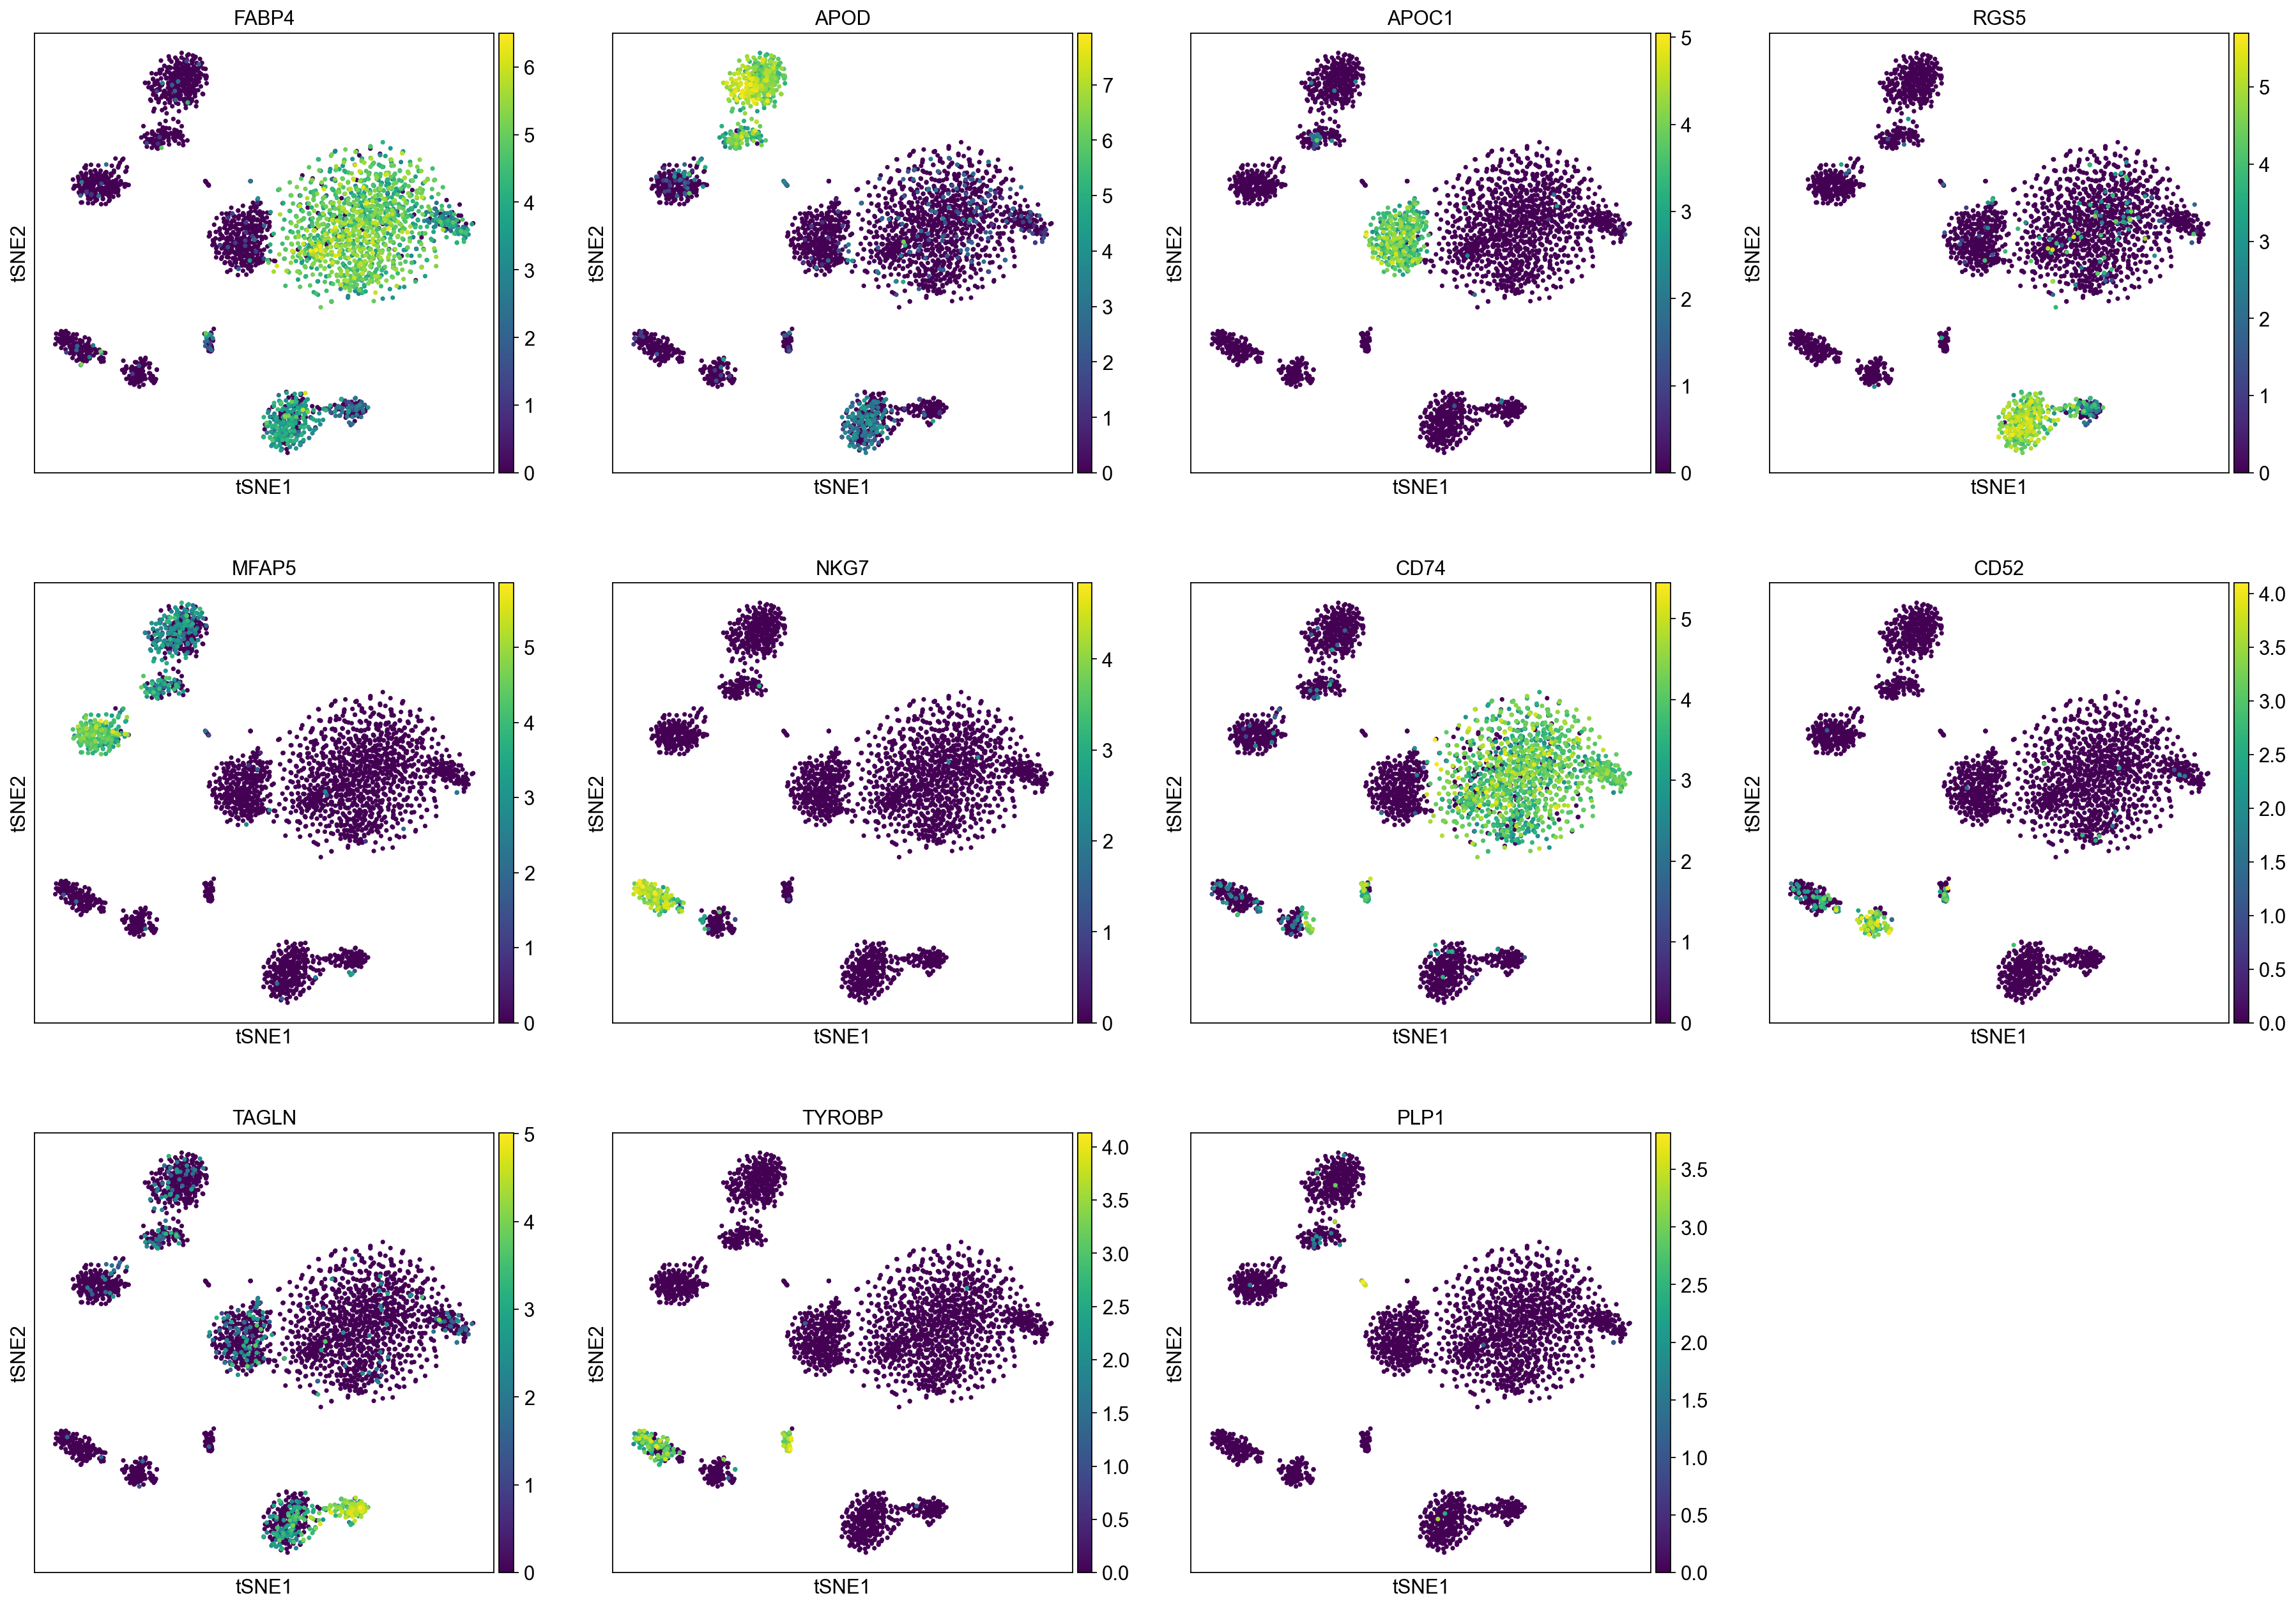

In [42]:
sc.settings.set_figure_params(dpi=80, facecolor='white',figsize=(6,6))
sc.pl.tsne(adata, color=['FABP4','APOD','APOC1','RGS5','MFAP5','NKG7','CD74','CD52','TAGLN','TYROBP','PLP1'])

In [54]:
new_cluster_names = ['Endothelial Cells','FAP Cells','Satellite Cells','Pericytes','FBN1+ FAP Cells','NK Cells','PCV Endothelial Cells','T Cells','Smooth Muscle Cells','Myeloid Cells','B Cells']

In [55]:
adata.rename_categories('leiden', new_cluster_names)

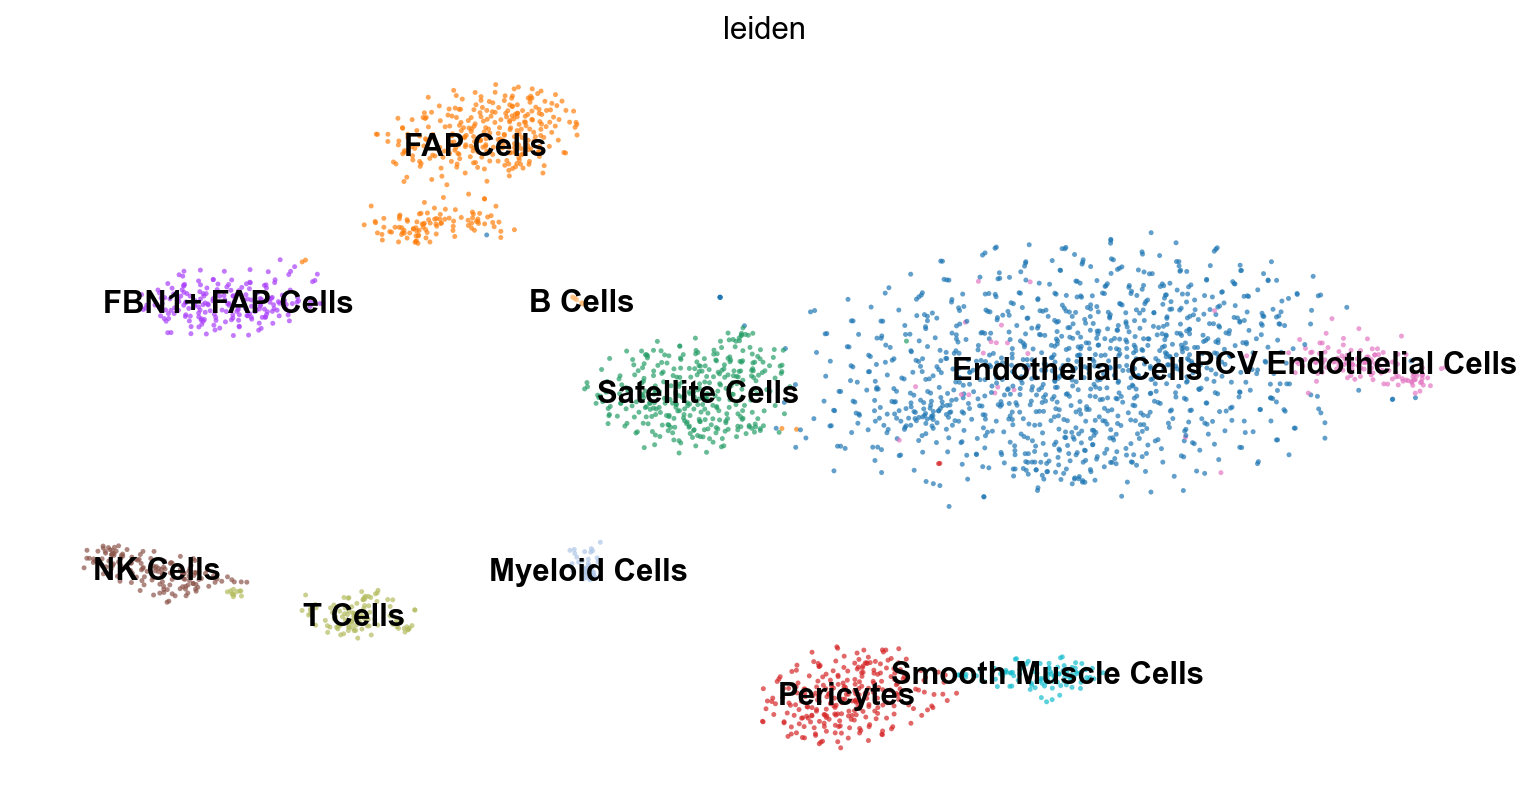

In [213]:
sc.pl.tsne(adata, color='leiden', legend_loc='on data', frameon=False,alpha=0.7,s=20)

In [214]:
marker_genes_dict = {
    'Endothelial Cells':['FABP4','IFI27'],
    'FAP Cells':['APOD','DCN','GSN'],
    'Satellite Cells':['APOC1'],
    'Pericytes':['RGS5','NDUFA4L2','IGFBP7'],
    'FBN1+ FAP Cells':['MFAP5','FBN1','FSTL1'],
    'NK Cells':['NKG7','CCL4'],
    'PCV Endothelial Cells':['CD74'],
    'T Cells':['CD52'],
    'Smooth Muscle Cells':['TAGLN','ACTA2','ADIRF'],
    'Myeloid Cells':['TYROBP','AIF1'],
    'B Cells':['STMN1','PLP1']
}

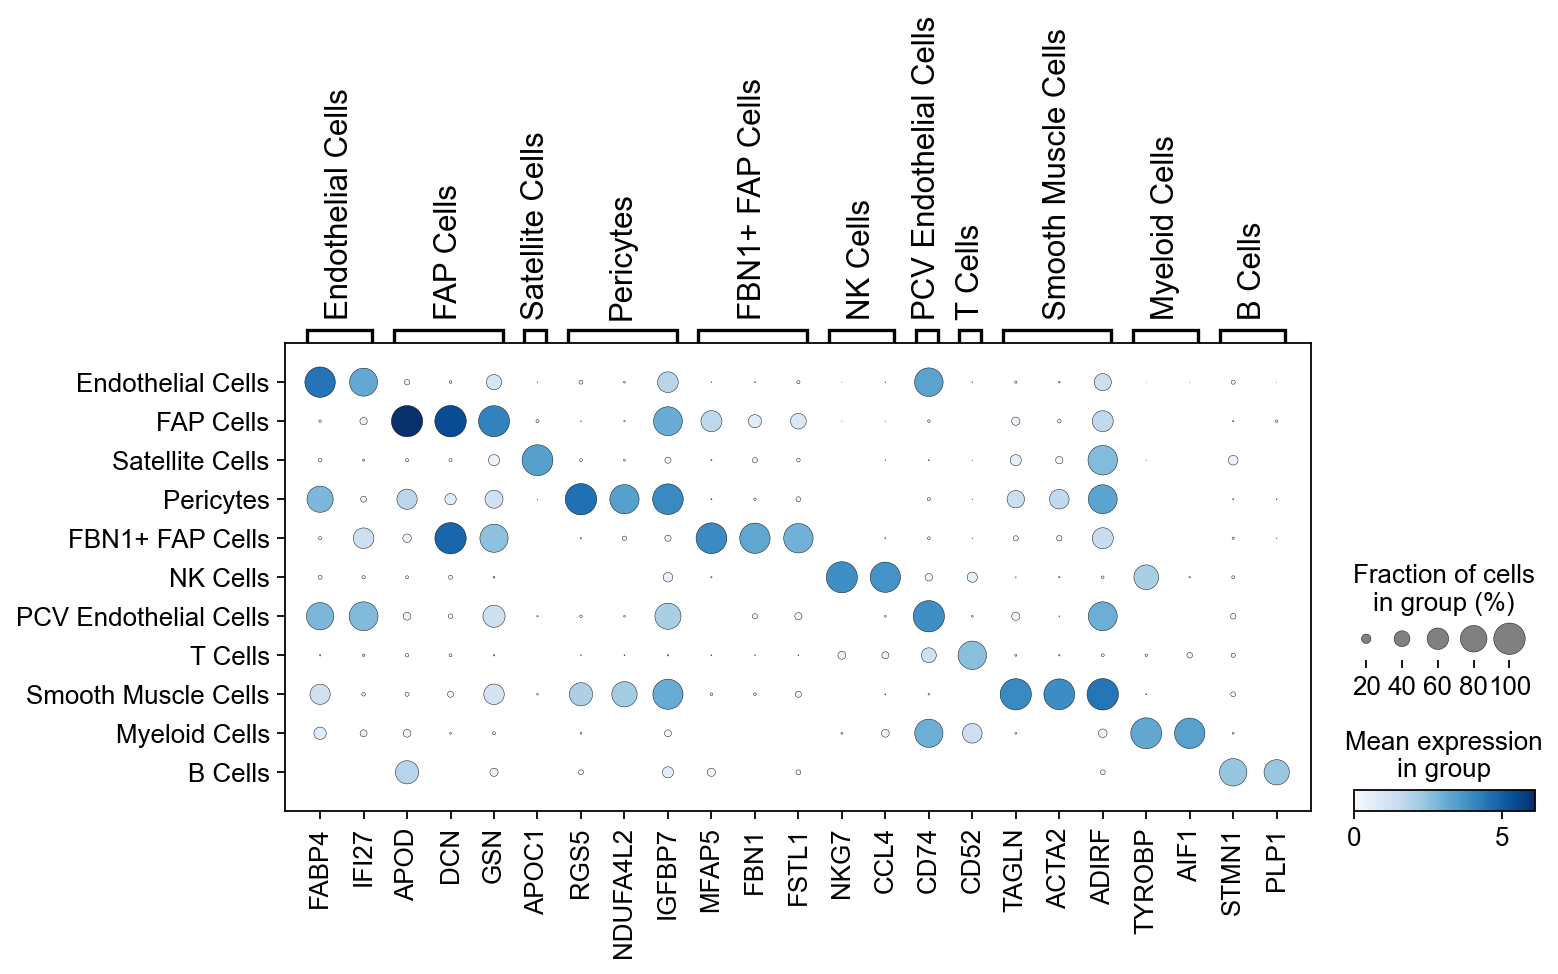

In [215]:
sc.pl.dotplot(adata, marker_genes_dict, 'leiden',dendrogram = False, cmap = 'Blues')

In [53]:
adata.obs

Sample  n_genes  n_genes_by_counts  total_counts  \
1_AAACCTGCAATCCGAT  Sample_1     1595               1595        9334.0   
1_AAACGGGGTCCAGTAT  Sample_1      295                295         765.0   
1_AAACGGGTCGGCTTGG  Sample_1      443                443        1150.0   
1_AAAGATGAGCAATATG  Sample_1     1131               1129        5075.0   
1_AAAGATGGTCAAAGCG  Sample_1      734                734        2391.0   
...                      ...      ...                ...           ...   
4_TTGTAGGTCTCTAAGG  Sample_4      633                633        1825.0   
4_TTTACTGAGACTGTAA  Sample_4      384                384        2065.0   
4_TTTACTGTCAGCCTAA  Sample_4      544                544        1354.0   
4_TTTCCTCAGGTGGGTT  Sample_4      267                267         904.0   
4_TTTGGTTCACTGTCGG  Sample_4      760                760        2779.0   

                    total_counts_mt  pct_counts_mt leiden  
1_AAACCTGCAATCCGAT            331.0       3.546175      1  
1_AAACGGGGTCCAGTAT             35.0       4.575163      3  
1_AAACGGGTCGGCTTGG             35.0       3.043478      0  
1_AAAGATGAGCAATATG             96.0       1.891626      0  
1_AAAGATGGTCAAAGCG             22.0       0.920117      1  
...                             ...            ...    ...  
4_TTGTAGGTCTCTAAGG             62.0       3.397260      1  
4_TTTACTGAGACTGTAA             54.0       2.615012      7  
4_TTTACTGTCAGCCTAA             58.0       4.283604      0  
4_TTTCCTCAGGTGGGTT              4.0       0.442478      0  
4_TTTGGTTCACTGTCGG            132.0       4.749910      3  

[2876 rows x 7 columns]

In [56]:
df = adata.obs
df=df[['Sample','leiden']]

In [57]:
df

Sample             leiden
1_AAACCTGCAATCCGAT  Sample_1          FAP Cells
1_AAACGGGGTCCAGTAT  Sample_1          Pericytes
1_AAACGGGTCGGCTTGG  Sample_1  Endothelial Cells
1_AAAGATGAGCAATATG  Sample_1  Endothelial Cells
1_AAAGATGGTCAAAGCG  Sample_1          FAP Cells
...                      ...                ...
4_TTGTAGGTCTCTAAGG  Sample_4          FAP Cells
4_TTTACTGAGACTGTAA  Sample_4            T Cells
4_TTTACTGTCAGCCTAA  Sample_4  Endothelial Cells
4_TTTCCTCAGGTGGGTT  Sample_4  Endothelial Cells
4_TTTGGTTCACTGTCGG  Sample_4          Pericytes

[2876 rows x 2 columns]

In [58]:
frequency = df.groupby(['Sample','leiden']).size().reset_index(name='Count')

In [59]:
agg_frequency = frequency.groupby(['leiden', 'Sample'])['Count'].sum().reset_index()

In [60]:
total_counts = agg_frequency.groupby('leiden')['Count'].sum().reset_index()

In [61]:
agg_frequency

leiden    Sample  Count
0       Endothelial Cells  Sample_1    385
1       Endothelial Cells  Sample_2    332
2       Endothelial Cells  Sample_3    214
3       Endothelial Cells  Sample_4    193
4               FAP Cells  Sample_1    103
5               FAP Cells  Sample_2    118
6               FAP Cells  Sample_3     59
7               FAP Cells  Sample_4     99
8         Satellite Cells  Sample_1    168
9         Satellite Cells  Sample_2    100
10        Satellite Cells  Sample_3     42
11        Satellite Cells  Sample_4     34
12              Pericytes  Sample_1     78
13              Pericytes  Sample_2     82
14              Pericytes  Sample_3     62
15              Pericytes  Sample_4     39
16        FBN1+ FAP Cells  Sample_1     12
17        FBN1+ FAP Cells  Sample_2    178
18        FBN1+ FAP Cells  Sample_3      0
19        FBN1+ FAP Cells  Sample_4     10
20               NK Cells  Sample_1     69
21               NK Cells  Sample_2     29
22               NK Cells  Sample_3     18
23               NK Cells  Sample_4     26
24  PCV Endothelial Cells  Sample_1     47
25  PCV Endothelial Cells  Sample_2     52
26  PCV Endothelial Cells  Sample_3     22
27  PCV Endothelial Cells  Sample_4     21
28                T Cells  Sample_1     32
29                T Cells  Sample_2     19
30                T Cells  Sample_3     16
31                T Cells  Sample_4     52
32    Smooth Muscle Cells  Sample_1     53
33    Smooth Muscle Cells  Sample_2     37
34    Smooth Muscle Cells  Sample_3      9
35    Smooth Muscle Cells  Sample_4      9
36          Myeloid Cells  Sample_1     13
37          Myeloid Cells  Sample_2     17
38          Myeloid Cells  Sample_3      5
39          Myeloid Cells  Sample_4     10
40                B Cells  Sample_1      6
41                B Cells  Sample_2      6
42                B Cells  Sample_3      0
43                B Cells  Sample_4      0

In [62]:
sorted_counts = total_counts.sort_values(by='Count').reset_index()

In [63]:
import plotly.express as px
fig = px.bar(agg_frequency, x='Count', y='leiden', color = 'Sample', barmode='stack', category_orders={'leiden': sorted_counts['leiden']})

In [64]:
fig